In [1]:
from utils import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

warnings.filterwarnings("ignore")
plt.style.use('deeplearning.mplstyle')


In [2]:
data = load_mnist_data('./data/train-images.idx3-ubyte', './data/train-labels.idx1-ubyte')
# Splitting the data into features and labels
x = data.iloc[:, :-10].values
x = x.reshape(-1, 28, 28, 1)
y = data.iloc[:, -10:].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(f'X_train shape: {X_train.shape}')
print(f'X_cv shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_cv shape: {y_test.shape}')

Data after normalization:
     0    1    2    3    4    5    6    7    8    9  ...  digit_0  digit_1  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        1        0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        1   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0        0   

   digit_2  digit_3  digit_4  digit_5  digit_6  digit_7  digit_8  digit_9  
0        0        0        0        1        0        0        0        0  
1        0        0        0        0        0        0        0        0  
2        0        0        1        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        1  

[5 rows x 794 columns]
X_train shape: (48000, 28

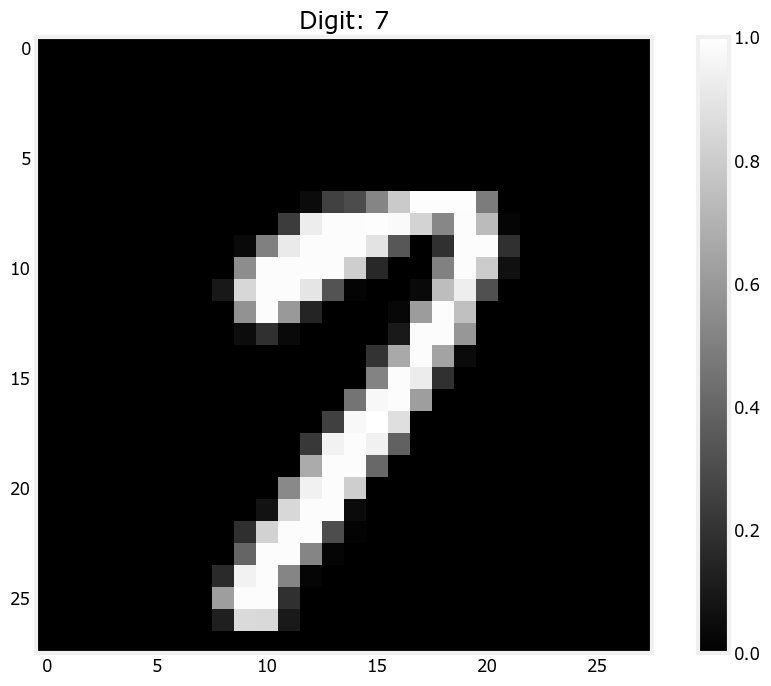

In [3]:
# Visualizing the data
plt.imshow(x[9999].reshape(28, 28), cmap='gray')
plt.title(f'Digit: {np.argmax(y[9999])}')
plt.colorbar()
plt.show()

In [4]:
models = build_cnn()

nn_accuracy_scores = np.zeros((3, 2))
i = 0
threshold = 0.7
for model in models:
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=CategoricalCrossentropy(from_logits=True))
    print(f'Training {model.name}')

    model.fit(X_train, y_train, epochs=5, verbose=1)

    print(f'{model.name} Trained')

    yhat = model.predict(X_train)
    yhat = tf.nn.softmax(yhat).numpy()
    yhat = np.argmax(yhat, axis=1)
    y_final = np.argmax(y_train, axis=1)
    print(y_final[9900])
    print(yhat[9900])
    nn_accuracy_scores[i, 0] = accuracy_score(y_final, yhat)

    yhat_cv = model.predict(X_test)
    yhat_cv = tf.nn.softmax(yhat_cv).numpy()
    yhat_cv = np.argmax(yhat_cv, axis=1)
    y_final_cv = np.argmax(y_test, axis=1)
    nn_accuracy_scores[i, 1] = accuracy_score(y_final_cv, yhat_cv)

    i += 1

for j in range(3):
    models[j].save(f'model{j}.h5')
    print(f'The Accuracy for {models[j].name}: {nn_accuracy_scores[j]}')

Training CNN1
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 115s 75ms/step - loss: 0.2413
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 116s 77ms/step - loss: 0.0373
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 112s 74ms/step - loss: 0.0195
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 96s 64ms/step - loss: 0.0148
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 61ms/step - loss: 0.0111
CNN1 Trained
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step
7
7
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Training CNN2
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 276s 183ms/step - loss: 0.2931
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 146s 97ms/step - loss: 0.0416
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 145s 96ms/step - loss: 0.0270
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 186s 124ms/step - loss: 0.0199
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 143s 95ms/step - loss: 0.0153
CNN2 Trained
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step
7
7
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step
Training CNN3
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━

The Accuracy for CNN1: [0.99683333 0.988     ]


The Accuracy for CNN2: [0.9936875  0.98733333]
The Accuracy for CNN3: [0.99408333 0.98691667]
